In [2]:
import matplotlib.pylab as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 10),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13,
         'axes.labelweight':'bold',
          'legend.fontsize': 13,
          'font.size':13,
         'figure.max_open_warning': 0}

plt.rcParams.update(params)
import matplotlib.colors as colors

In [3]:
import dask.array as da
import xarray as xr
from daskms import xds_from_table, xds_to_table
from dask.distributed import Client

import numpy as np

In [4]:
client = Client(n_workers=4, 
                threads_per_worker=4, 
                processes=True, 
                memory_limit='8GB'
                )
client

<Client: 'tcp://127.0.0.1:41699' processes=4 threads=16, memory=29.80 GiB>

In [5]:
data_path = '/home/thobile/Documents/Postgraduate/Second Semester/OT2/'

In [6]:
ds = xds_from_table(data_path+"1548939342.ms")

In [7]:
print(ds)

[<xarray.Dataset> Size: 1GB
Dimensions:          (row: 31875, chan: 1024, corr: 2, flagcat: 1, uvw: 3)
Coordinates:
    ROWID            (row) int64 255kB dask.array<chunksize=(10000,), meta=np.ndarray>
Dimensions without coordinates: row, chan, corr, flagcat, uvw
Data variables: (12/24)
    IMAGING_WEIGHT   (row, chan) float32 131MB dask.array<chunksize=(10000, 1024), meta=np.ndarray>
    FEED1            (row) int32 128kB dask.array<chunksize=(10000,), meta=np.ndarray>
    ANTENNA1         (row) int32 128kB dask.array<chunksize=(10000,), meta=np.ndarray>
    STATE_ID         (row) int32 128kB dask.array<chunksize=(10000,), meta=np.ndarray>
    PROCESSOR_ID     (row) int32 128kB dask.array<chunksize=(10000,), meta=np.ndarray>
    FIELD_ID         (row) int32 128kB dask.array<chunksize=(10000,), meta=np.ndarray>
    ...               ...
    UVW              (row, uvw) float64 765kB dask.array<chunksize=(10000, 3), meta=np.ndarray>
    TIME             (row) float64 255kB dask.array<ch

In [8]:
for key in ds[0].keys():
    print(key)

IMAGING_WEIGHT
FEED1
ANTENNA1
STATE_ID
PROCESSOR_ID
FIELD_ID
SCAN_NUMBER
DATA_DESC_ID
FLAG
FLAG_CATEGORY
FLAG_ROW
INTERVAL
OBSERVATION_ID
FEED2
EXPOSURE
WEIGHT
WEIGHT_SPECTRUM
ARRAY_ID
UVW
TIME
ANTENNA2
TIME_CENTROID
SIGMA
DATA


In [9]:
obs_table = xds_from_table(data_path+"1548939342.ms::OBSERVATION")
print(obs_table)

[<xarray.Dataset> Size: 81B
Dimensions:         (row: 1, schedule: 1, obs-exts: 2, log: 1)
Coordinates:
    ROWID           (row) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: row, schedule, obs-exts, log
Data variables:
    OBSERVER        (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    RELEASE_DATE    (row) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    PROJECT         (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    SCHEDULE        (row, schedule) object 8B dask.array<chunksize=(1, 1), meta=np.ndarray>
    TIME_RANGE      (row, obs-exts) float64 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    TELESCOPE_NAME  (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    SCHEDULE_TYPE   (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    LOG             (row, log) object 8B dask.array<chunksize=(1, 1), meta=np.ndarray>
    FLAG_ROW        (row) bool 1B dask.array<chunksize=(1,), meta=

In [10]:
obs_table2 = xds_from_table(data_path+"1548939342.ms::SPECTRAL_WINDOW")
# obs_table3 = xds_from_table(data_path+"1548939342.ms::ANTENNA")
# print(obs_table3)
print(obs_table2)

[<xarray.Dataset> Size: 33kB
Dimensions:          (row: 1, chan: 1024)
Coordinates:
    ROWID            (row) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: row, chan
Data variables: (12/14)
    NET_SIDEBAND     (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    CHAN_FREQ        (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    MEAS_FREQ_REF    (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    FREQ_GROUP_NAME  (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    NUM_CHAN         (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    EFFECTIVE_BW     (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    ...               ...
    FREQ_GROUP       (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    CHAN_WIDTH       (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    FLAG_ROW         (row) bool 1B dask.array<chunksize=(1,),

In [11]:
print(obs_table)
for key in obs_table[0].keys():

    print(f'{key}: {obs_table[0][key].values}')

[<xarray.Dataset> Size: 81B
Dimensions:         (row: 1, schedule: 1, obs-exts: 2, log: 1)
Coordinates:
    ROWID           (row) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: row, schedule, obs-exts, log
Data variables:
    OBSERVER        (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    RELEASE_DATE    (row) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    PROJECT         (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    SCHEDULE        (row, schedule) object 8B dask.array<chunksize=(1, 1), meta=np.ndarray>
    TIME_RANGE      (row, obs-exts) float64 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    TELESCOPE_NAME  (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    SCHEDULE_TYPE   (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    LOG             (row, log) object 8B dask.array<chunksize=(1, 1), meta=np.ndarray>
    FLAG_ROW        (row) bool 1B dask.array<chunksize=(1,), meta=

In [12]:
print(obs_table2)
for key in obs_table2[0].keys():

    print(f'{key}: {obs_table2[0][key].values}')

[<xarray.Dataset> Size: 33kB
Dimensions:          (row: 1, chan: 1024)
Coordinates:
    ROWID            (row) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: row, chan
Data variables: (12/14)
    NET_SIDEBAND     (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    CHAN_FREQ        (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    MEAS_FREQ_REF    (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    FREQ_GROUP_NAME  (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    NUM_CHAN         (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    EFFECTIVE_BW     (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    ...               ...
    FREQ_GROUP       (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    CHAN_WIDTH       (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    FLAG_ROW         (row) bool 1B dask.array<chunksize=(1,),

In [13]:
A1 = ds[0]["ANTENNA1"]
A2 = ds[0]["ANTENNA2"]
ant_list = list(set(np.append(A1,A2)))
nants = len(ant_list)
inter = ds[0]["INTERVAL"]
print(f'Total number of antennas used {nants}')
print('Interval Table Shape: ',inter.shape)
print(f'Dump rate is {np.median(inter)} s');

Total number of antennas used 50
Interval Table Shape:  (31875,)
Dump rate is 7.9966169712 s


In [14]:
from datetime import datetime 
from astropy.time import Time

start_time = 5.05565617e+09
end_time = 5.05565639e+09

start_datetime = start_time / 86400
end_datetime = end_time / 86400

start_mjd = Time(start_datetime, format='mjd')
end_mjd = Time(end_datetime, format='mjd')
start = Time(start_mjd, format='mjd')
end = Time(end_mjd, format='mjd')

print(f'starting time: {start.iso}')
print(f'ending time: {end.iso}')



starting time: 2019-01-31 12:56:10.000
ending time: 2019-01-31 12:59:50.000


In [15]:
ds[0]['UVW']

<xarray.DataArray 'UVW' (row: 31875, uvw: 3)> Size: 765kB
dask.array<read~UVW~1548939342.ms, shape=(31875, 3), dtype=float64, chunksize=(10000, 3), chunktype=numpy.ndarray>
Coordinates:
    ROWID    (row) int64 255kB dask.array<chunksize=(10000,), meta=np.ndarray>
Dimensions without coordinates: row, uvw

In [16]:
u,v,w = ds[0]['UVW'][:,0],ds[0]['UVW'][:,1],ds[0]['UVW'][:,2]

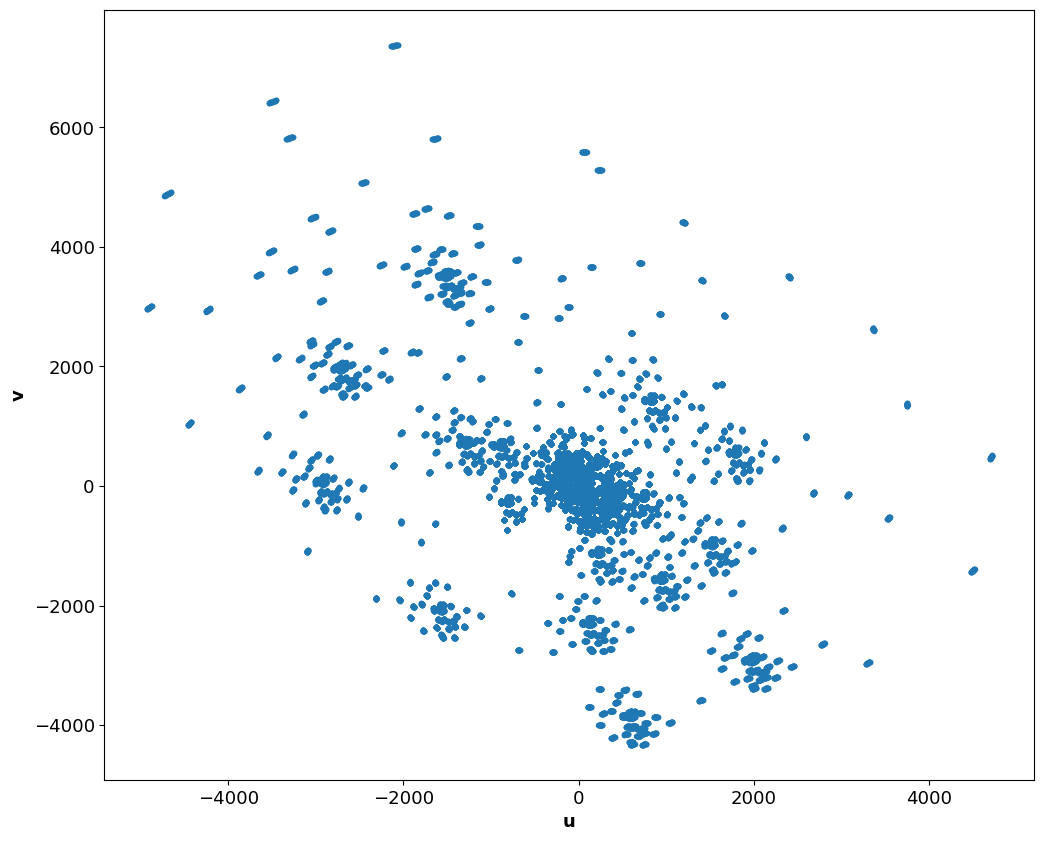

In [68]:
plt.plot(u,v,'.')
plt.xlabel('u')
plt.ylabel('v')
plt.savefig('uv plot')

In [18]:
antenna_table = xds_from_table(data_path+"1548939342.ms::ANTENNA")

print(antenna_table)

[<xarray.Dataset> Size: 5kB
Dimensions:        (row: 50, xyz: 3)
Coordinates:
    ROWID          (row) int64 400B dask.array<chunksize=(50,), meta=np.ndarray>
Dimensions without coordinates: row, xyz
Data variables:
    OFFSET         (row, xyz) float64 1kB dask.array<chunksize=(50, 3), meta=np.ndarray>
    POSITION       (row, xyz) float64 1kB dask.array<chunksize=(50, 3), meta=np.ndarray>
    STATION        (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    NAME           (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    TYPE           (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    FLAG_ROW       (row) bool 50B dask.array<chunksize=(50,), meta=np.ndarray>
    DISH_DIAMETER  (row) float64 400B dask.array<chunksize=(50,), meta=np.ndarray>
    MOUNT          (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
Attributes:
    __daskms_partition_schema__:  ()]


In [19]:
antenna_table[0]

<xarray.Dataset> Size: 5kB
Dimensions:        (row: 50, xyz: 3)
Coordinates:
    ROWID          (row) int64 400B dask.array<chunksize=(50,), meta=np.ndarray>
Dimensions without coordinates: row, xyz
Data variables:
    OFFSET         (row, xyz) float64 1kB dask.array<chunksize=(50, 3), meta=np.ndarray>
    POSITION       (row, xyz) float64 1kB dask.array<chunksize=(50, 3), meta=np.ndarray>
    STATION        (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    NAME           (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    TYPE           (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    FLAG_ROW       (row) bool 50B dask.array<chunksize=(50,), meta=np.ndarray>
    DISH_DIAMETER  (row) float64 400B dask.array<chunksize=(50,), meta=np.ndarray>
    MOUNT          (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
Attributes:
    __daskms_partition_schema__:  ()

In [20]:
antenna_table[0]['NAME'].values

array(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm009', 'm010',
       'm011', 'm013', 'm014', 'm015', 'm017', 'm019', 'm020', 'm021',
       'm022', 'm023', 'm024', 'm025', 'm027', 'm028', 'm029', 'm031',
       'm032', 'm033', 'm035', 'm037', 'm038', 'm039', 'm040', 'm041',
       'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049',
       'm050', 'm051', 'm055', 'm056', 'm057', 'm058', 'm059', 'm060',
       'm061', 'm062'], dtype=object)

In [21]:
antenna_table[0]['DISH_DIAMETER'].values

array([13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5,
       13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5,
       13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5,
       13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5,
       13.5, 13.5, 13.5, 13.5, 13.5, 13.5])

In [22]:
antenna_table[0]['POSITION']

<xarray.DataArray 'POSITION' (row: 50, xyz: 3)> Size: 1kB
dask.array<read~POSITION~1548939342.ms/ANTENNA, shape=(50, 3), dtype=float64, chunksize=(50, 3), chunktype=numpy.ndarray>
Coordinates:
    ROWID    (row) int64 400B dask.array<chunksize=(50,), meta=np.ndarray>
Dimensions without coordinates: row, xyz

In [23]:
print(antenna_table[0]['POSITION'].values)

[[ 5109224.28330101  2006790.34830945 -3239100.60432023]
 [ 5109237.64002439  2006805.67700518 -3239069.99463992]
 [ 5109224.98529035  2006765.00133159 -3239115.19822119]
 [ 5109247.71453184  2006736.9651357  -3239096.13442916]
 [ 5109244.68809625  2006674.4233089  -3239139.81459295]
 [ 5109222.76106102  2006688.94849795 -3239165.94167899]
 [ 5109132.82118802  2006798.06539449 -3239242.19060095]
 [ 5109046.34250297  2006823.98222895 -3239363.79206003]
 [ 5109122.96650556  2006849.69137709 -3239225.88024209]
 [ 5109048.21915394  2006984.47473988 -3239261.95549118]
 [ 5109082.89642682  2007045.23603689 -3239169.09259079]
 [ 5109139.53273202  2006992.24816646 -3239111.37666584]
 [ 5109193.73983259  2007001.70002865 -3239019.08733502]
 [ 5109122.95791977  2006942.91666107 -3239168.36029351]
 [ 5109142.92017108  2006871.50044504 -3239180.65456621]
 [ 5109272.06096906  2006500.0158821  -3239203.48775662]
 [ 5109454.06397737  2006488.737612   -3238920.41294648]
 [ 5109368.62411322  2006509.64

In [24]:
X,Y,Z = antenna_table[0]['POSITION'][:,0],antenna_table[0]['POSITION'][:,1],antenna_table[0]['POSITION'][:,2]

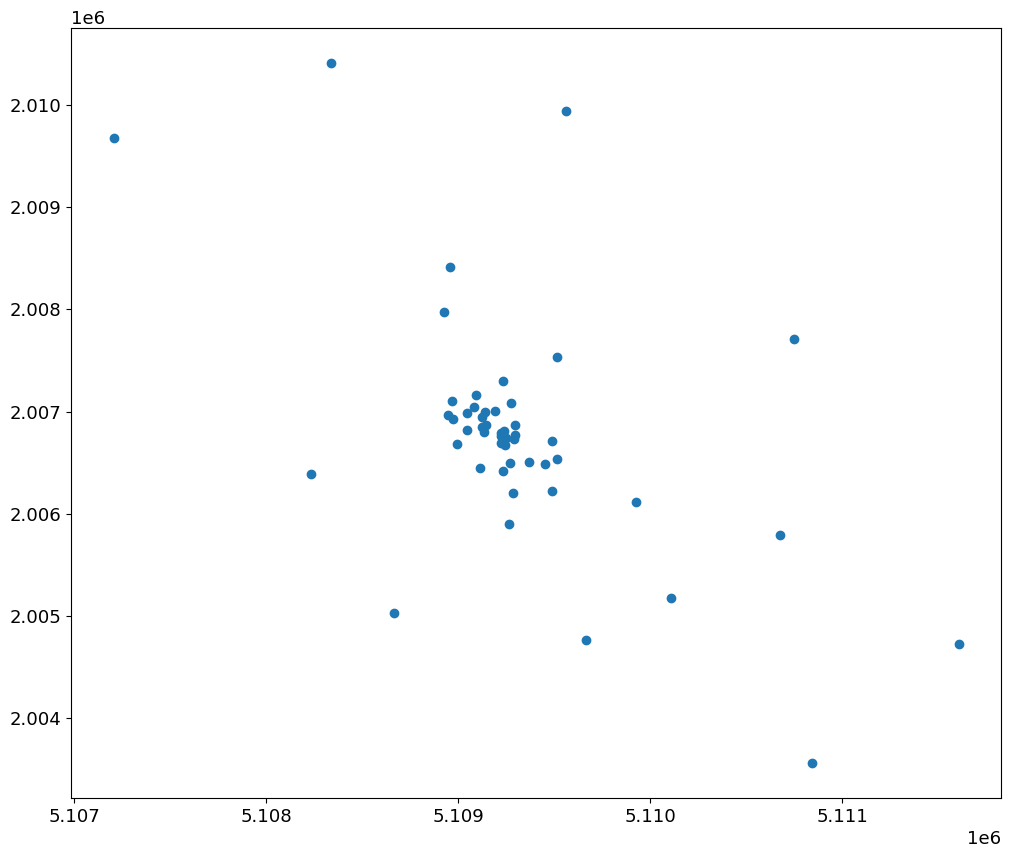

In [25]:
plt.plot(X,Y, 'o')

In [26]:
spectral_table = xds_from_table(data_path+"1548939342.ms::SPECTRAL_WINDOW")

In [27]:
spectral_table[0]

<xarray.Dataset> Size: 33kB
Dimensions:          (row: 1, chan: 1024)
Coordinates:
    ROWID            (row) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: row, chan
Data variables: (12/14)
    NET_SIDEBAND     (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    CHAN_FREQ        (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    MEAS_FREQ_REF    (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    FREQ_GROUP_NAME  (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    NUM_CHAN         (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    EFFECTIVE_BW     (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    ...               ...
    FREQ_GROUP       (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    CHAN_WIDTH       (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    FLAG_ROW         (row) bool 1B dask.array<chunksize=(1,), meta=np.ndarray>
    REF_FREQUENCY    (row) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    IF_CONV_CHAIN    (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    RESOLUTION       (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
Attributes:
    __daskms_partition_schema__:  ()

In [28]:
frequencies = spectral_table[0]['CHAN_FREQ'].values
nchannels = spectral_table[0]['NUM_CHAN'].values[0]
channel_width = spectral_table[0]['CHAN_WIDTH'].values[0][0]


summary = {
    'Frequencies': frequencies,
    'No_Channeles': nchannels,
    'Channel_Width': channel_width,
    }

In [29]:
print(f"Frequency range (MHz): {summary['Frequencies'].min()/1.e6} - {summary['Frequencies'].max()/1.e6}")  
print(f"Total no of channles {summary['No_Channeles']}")
print(f"Channel width (kHz): {channel_width/1.e3}")

Frequency range (MHz): 856.0 - 1711.1640625
Total no of channles 1024
Channel width (kHz): 835.9375


In [30]:
vis = ds[0]['DATA']

In [31]:
vis.shape

(31875, 1024, 2)

/home/thobile/anaconda3/envs/daskms/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/thobile/anaconda3/envs/daskms/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/thobile/anaconda3/envs/daskms/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/thobile/anaconda3/envs/daskms/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


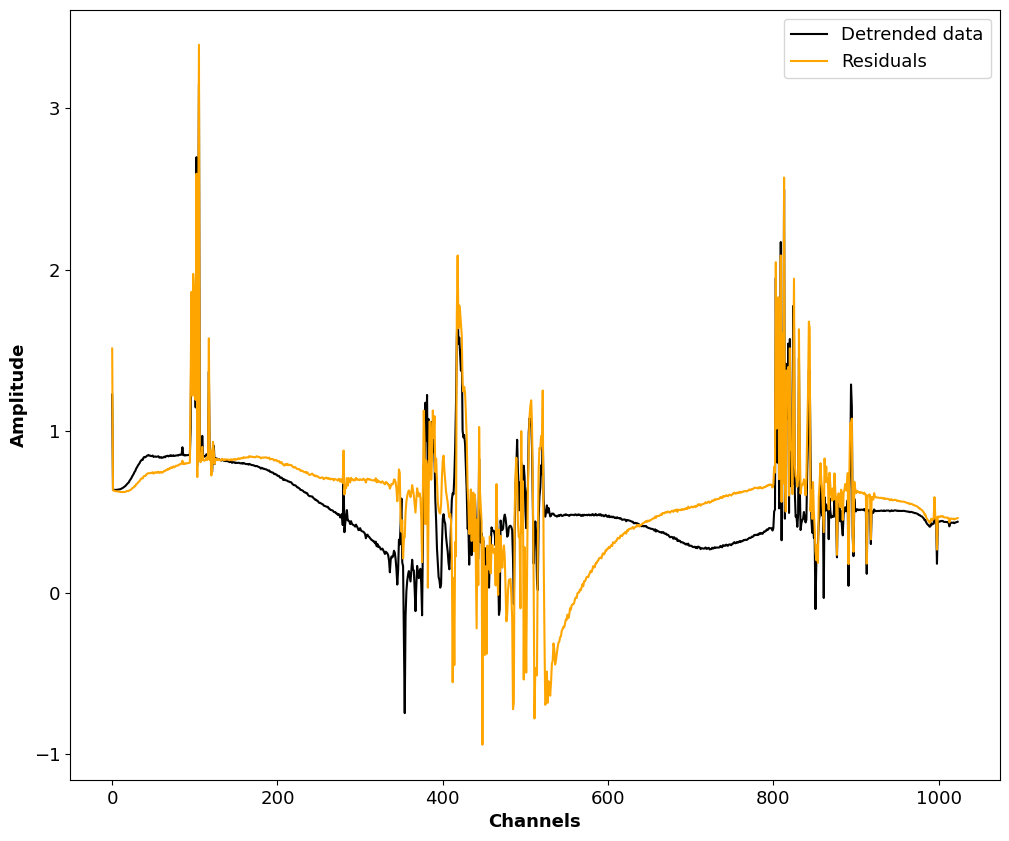

In [89]:
from scipy import signal

detrended_signal = signal.detrend((vis[500,:,0]))
residual = np.abs(vis[500,:,0]) - detrended_signal

plt.figure()
plt.plot(np.log10(detrended_signal), 'k', label='Detrended data')
plt.plot(np.log10(residual), 'orange', label='Residuals')
plt.ylabel('Amplitude')
plt.xlabel('Channels')
plt.legend()
plt.savefig('detrend')


/home/thobile/anaconda3/envs/daskms/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/thobile/anaconda3/envs/daskms/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


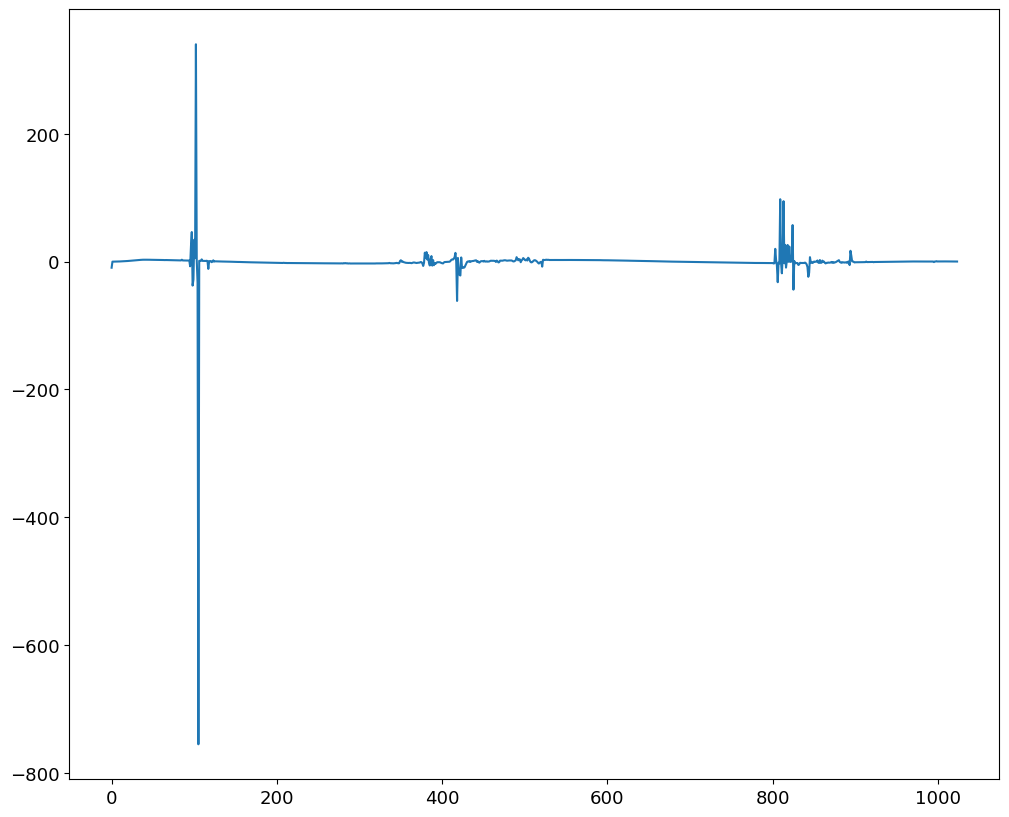

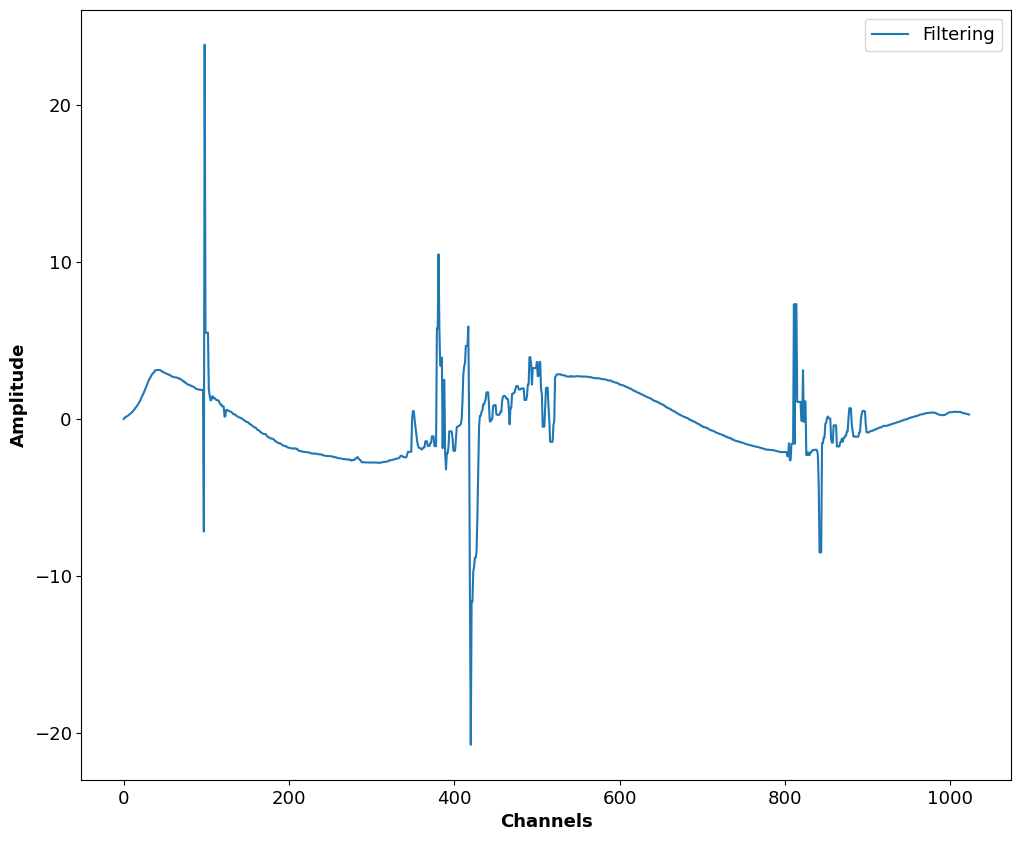

In [107]:
from scipy.signal import medfilt

size = 5
filter_signal = medfilt(np.real(vis[500,:,0]), kernel_size=size)

plt.plot((vis[500,:,0]), label='Original Signal')

plt.figure()
plt.plot(filter_signal, label='Filtering')
plt.xlabel('Channels')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('Filter')
plt.show()

In [33]:
vis_clean = []
vis_rfi = []
a1 = 1
a2 = 2

for a1 in range(0,10):
    for a2 in range(1,10):
        idx = np.where((ds[0].ANTENNA1 == a1) & (ds[0].ANTENNA2 == a2))[0]

        vis_rfi.append(np.abs(ds[0].DATA.data[idx][:, 400,0].compute()))
        vis_clean.append(np.abs(ds[0].DATA.data[idx][:,600,0].compute()))

        # ds[0].DATA.data[a1].compute(),ds[0].DATA.data[a2].compute()

combined_array_clean = np.concatenate(vis_clean)
combined_array_rfi = np.concatenate(vis_rfi)

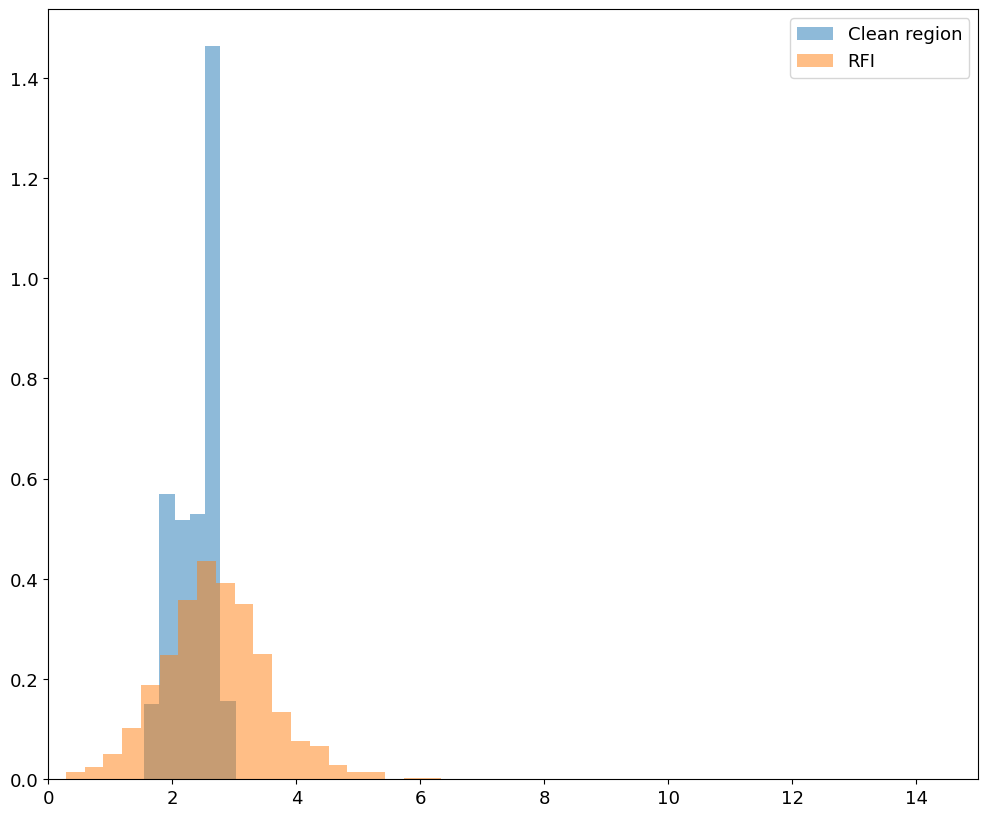

In [34]:
plt.hist(combined_array_clean, 
         bins=300,
         alpha=0.5,
         #histtype=u'step', 
         #lw=2, 
         density=True, label='Clean region')

plt.hist(combined_array_rfi, 
         bins=300,
         alpha=0.5,
         #histtype=u'step', 
         #lw=2, 
         density=True, label='RFI')
plt.xlim(0, 15)
plt.legend()

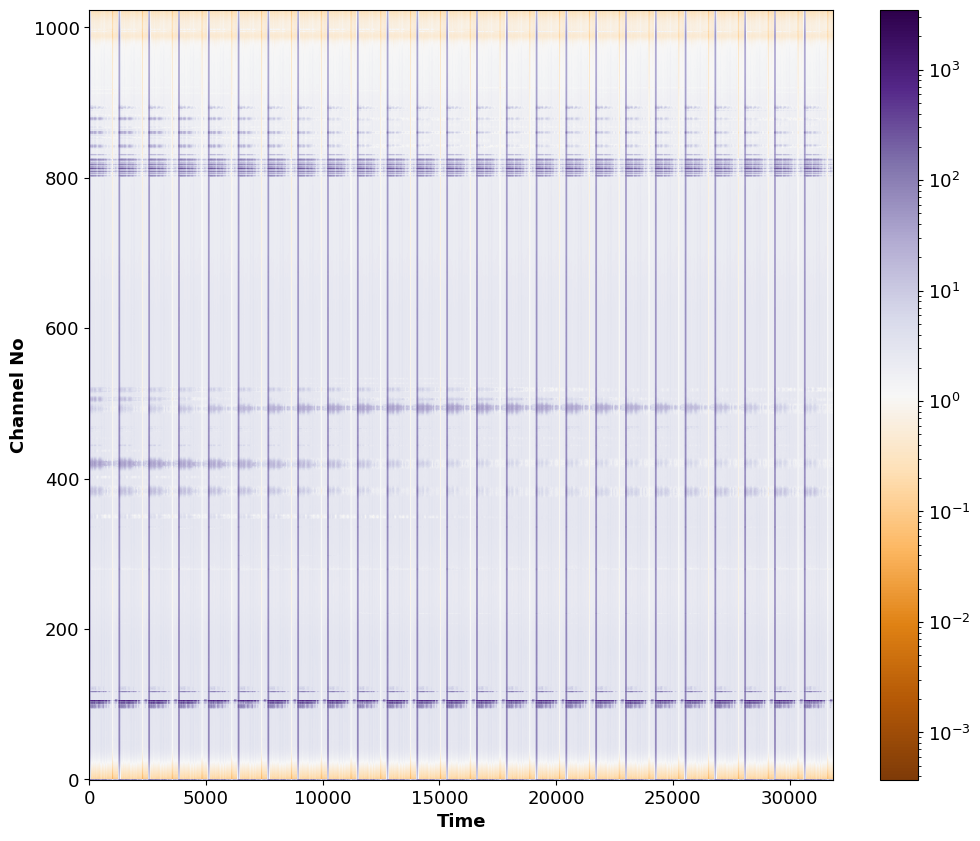

In [35]:
plt.imshow(np.abs(vis[:,:,0]).T, 
           aspect= 'auto', 
           origin='lower', 
           cmap='PuOr', 
           norm = colors.LogNorm()
           );
plt.ylabel('Channel No')
plt.xlabel('Time')
plt.colorbar();

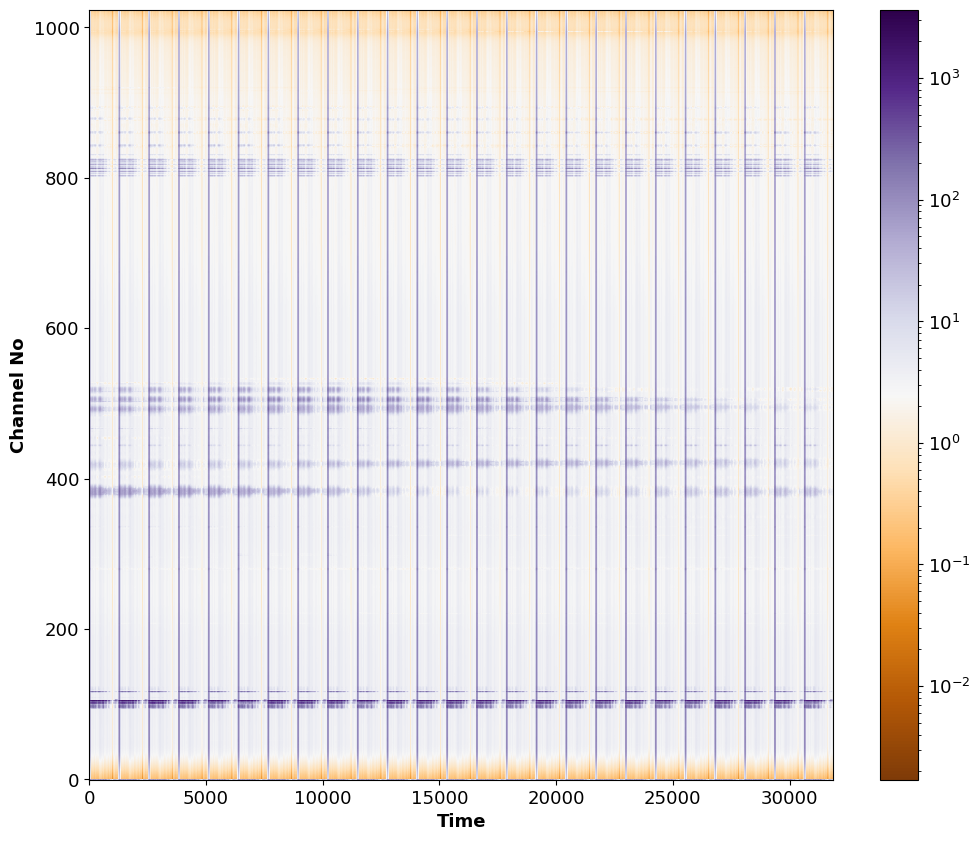

In [36]:
plt.imshow(np.abs(vis[:,:,1]).T, 
           aspect= 'auto', 
           origin='lower', 
           cmap='PuOr', 
           norm = colors.LogNorm()
           );
plt.ylabel('Channel No')
plt.xlabel('Time')
plt.colorbar();

Text(0.5, 0, 'Channels')

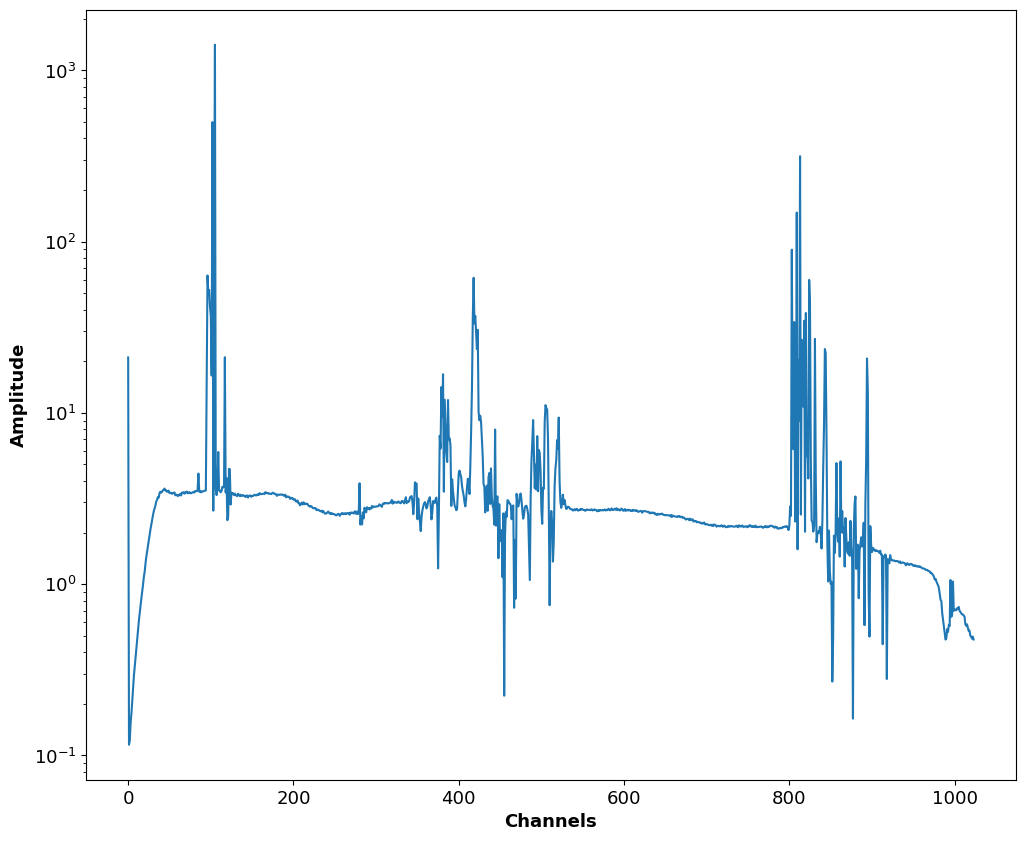

In [59]:
phaset2selected = np.angle(vis[500,:,0].T)


plt.plot(np.abs(vis[500,:,0]))
plt.semilogy()
plt.ylabel('Amplitude')
plt.xlabel('Channels')

Text(0.5, 0, 'Channel')

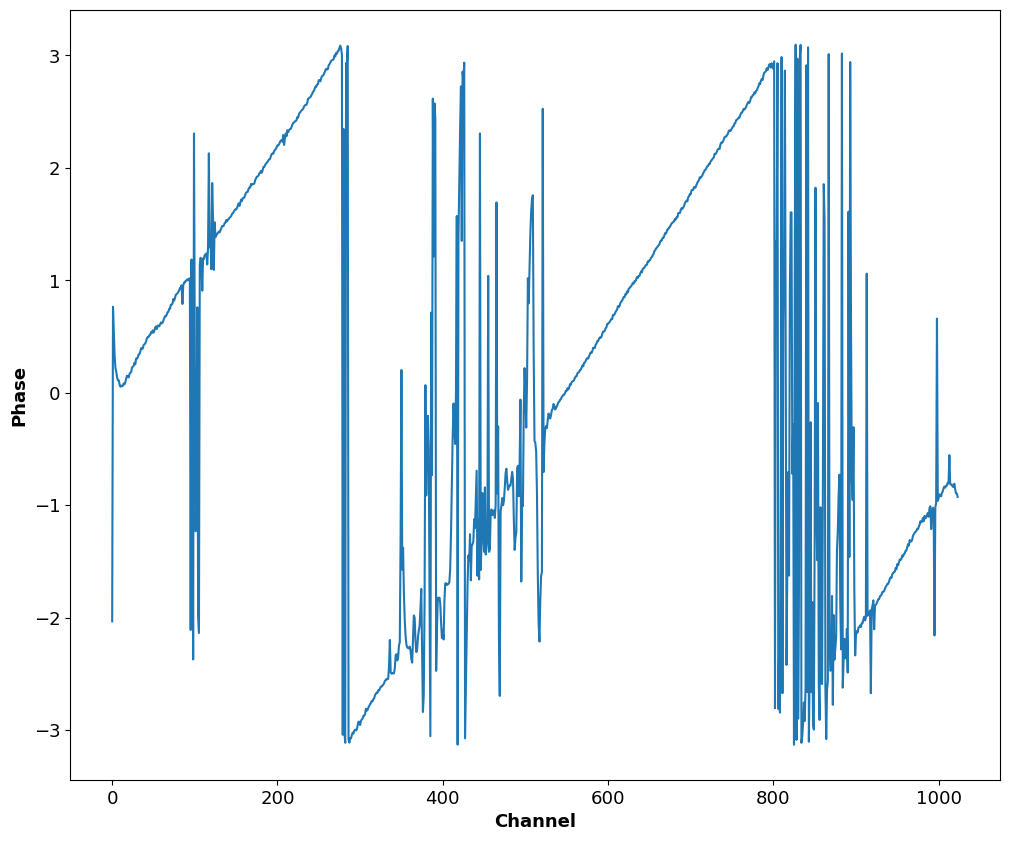

In [38]:
plt.plot(phaset2selected)
plt.ylabel('Phase')
plt.xlabel('Channel')


Text(0.5, 0, 'Channel')

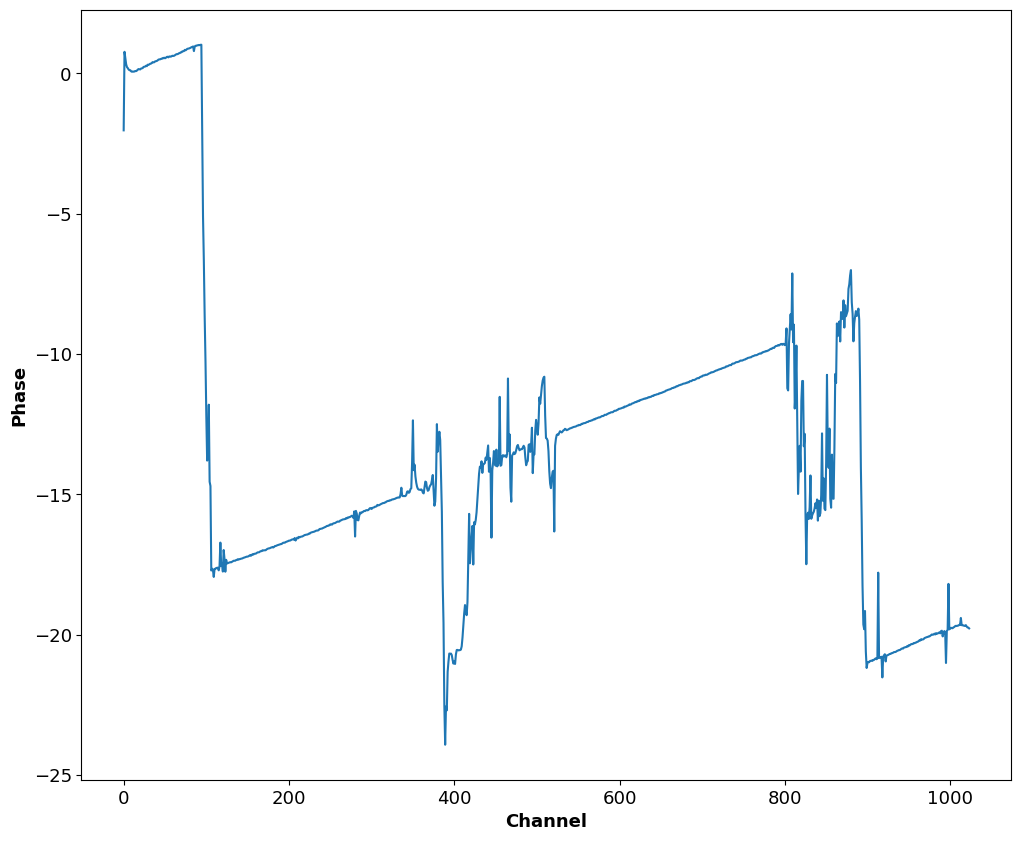

In [39]:
plt.plot(np.unwrap(phaset2selected))
plt.ylabel('Phase')
plt.xlabel('Channel')

/tmp/ipykernel_21842/1952959673.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax1.set_xticks(np.arange(frequencies[0]/1.e6,frequencies[-1]/1.e6, step=100))


(array([], dtype=int64), array([], dtype=int64))
[1.52475e+09] [1.56654688e+09]


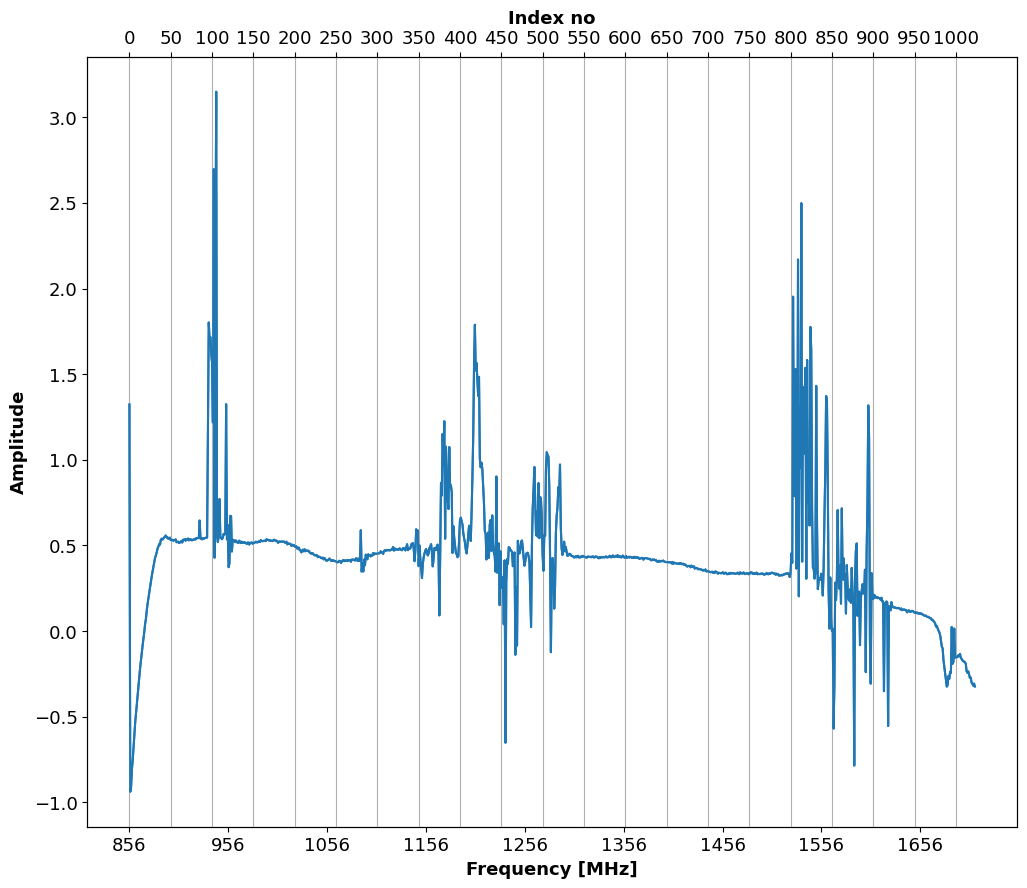

In [40]:
# Plot the average across frequency slice

frequencies = spectral_table[0]['CHAN_FREQ'].values.T
absdata = np.abs(vis[500,:,0]).compute()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(frequencies/1.e6,np.log10(absdata),'-')
ax1.set_xticks(np.arange(frequencies[0]/1.e6,frequencies[-1]/1.e6, step=100))
ax1.set_xlabel('Frequency [MHz]')
ax1.set_ylabel('Amplitude')

ax2.plot(np.log10(absdata))
ax2.set_xticks(np.arange(0,absdata.shape[0], step=50))
ax2.set_xlabel('Index no')
plt.grid()

target = 1.5e+09
index = np.where(frequencies/1.e6 == target)
print(index)

print(frequencies[800],frequencies[850])

In [41]:
from scipy.optimize import curve_fit, minimize_scalar

In [42]:
def Gauss(x, dc, a, x0, sigma):
    '''
    This will fit a gaussian function to a data set
    '''
    return dc+a * np.exp(-(x - x0)**2 / (2 * sigma**2))


Text(0, 0.5, 'amplitude')

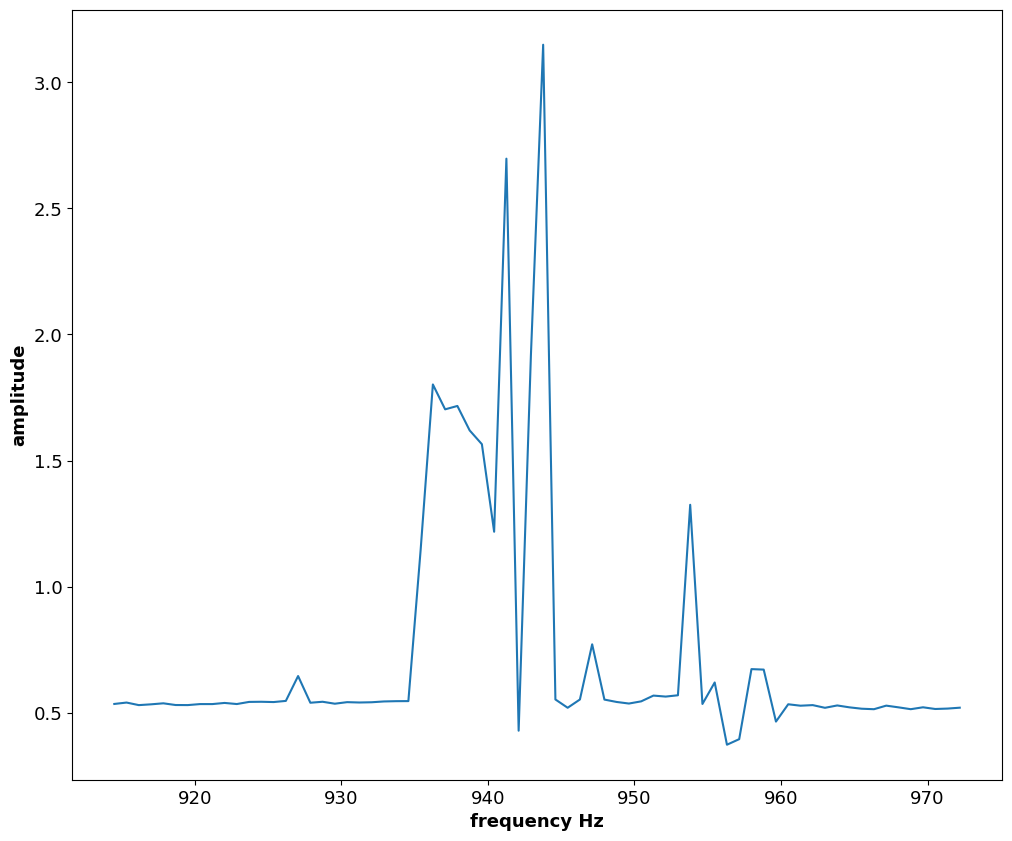

In [43]:
rfi = vis[:,350,0]
freq = spectral_table[0]['CHAN_FREQ'].values.T
absdata = np.abs(vis[500,:,0]).compute()

#plt.plot(freq, np.log10(np.abs(vis[500,:,0])))

noise = freq[70:140]
noise_data = absdata[70:140]

plt.plot(noise / 1.e6, np.log10(noise_data))
plt.xlabel('frequency Hz')
plt.ylabel('amplitude')


/tmp/ipykernel_21842/3965740936.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_new = np.arange(frequencies[ini_idx], frequencies[fin_idx],15)


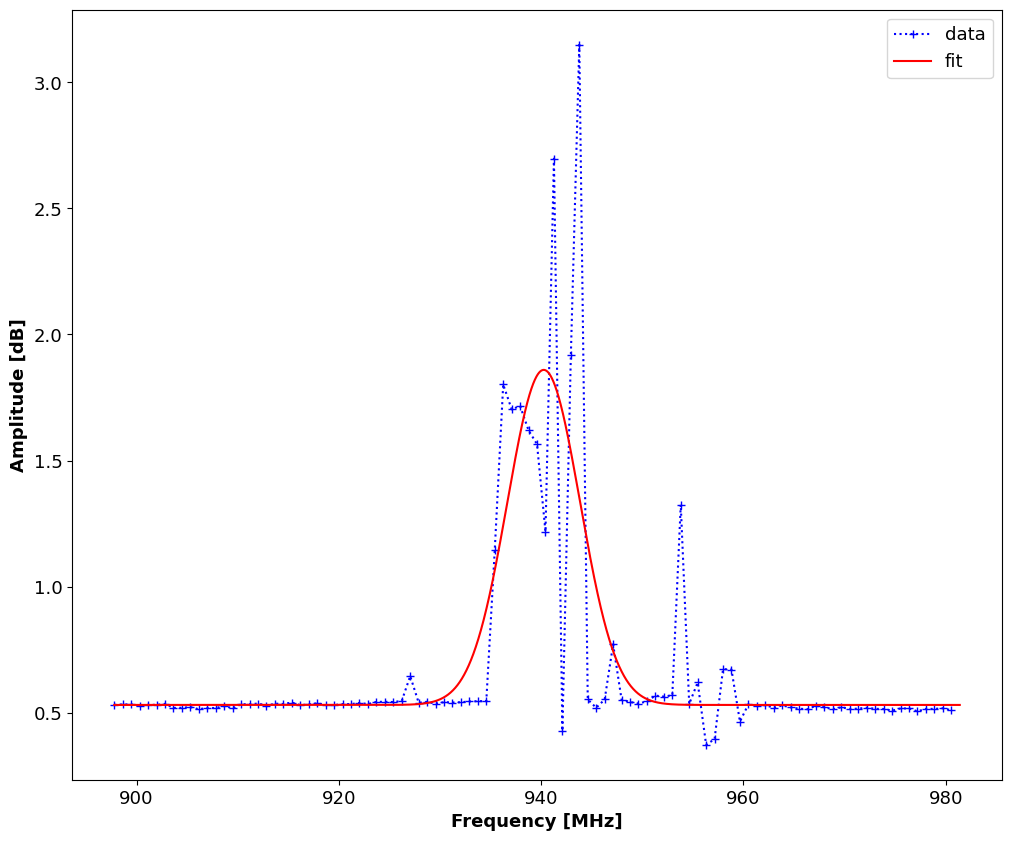

FWHM [MHz] =  50.38951245943112
Maximum amplitude is at [db], 1.859494542615899 
Maximum is at [MHz]  940.25688
Number of channels affected 60


In [69]:
# 350 - 400 good spike
# Use 50-150 for 1548939342.ms
ini_idx = int(input('Enter initial index for Gaussian fit '))
fin_idx = int(input('Enter final index for Gaussian fit '))

x = np.ravel(frequencies[ini_idx:fin_idx])
y = np.log10(absdata[ini_idx:fin_idx])

# weighted arithmetic mean (corrected - check the section below)
mean = (sum(x * y) / sum(y)).values
sigma = (np.sqrt(sum(y * (x - mean)**2) / sum(y))).values

dc = np.nanmean(np.log10(absdata[200:500]).values)

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), dc, mean, sigma])

plt.plot(x/1e6, y, 'b+:', label='data')
x_new = np.arange(frequencies[ini_idx], frequencies[fin_idx],15)
plt.plot(x_new/1e6, Gauss(x_new, *popt), 'r-', label='fit')
plt.legend()

plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [MHz]')
plt.savefig('Gaussian fit')
plt.show()

print (f"FWHM [MHz] =  {(2.*np.sqrt(2.*np.log(2.))*sigma)/1.e6}")
print(f"Maximum amplitude is at [db], {max(Gauss(x_new, *popt))} ")
print (f"Maximum is at [MHz]  {x_new[np.argmax(Gauss(x_new, *popt))]/1.e6}")
print(f"Number of channels affected {int(((2.*np.sqrt(2.*np.log(2.))*sigma))/(channel_width))}")